# SURVIVAL RATES OF THE TITANIC 

In [31]:
#First load the data
import pandas as pd
import os
import numpy as np

root = "titanic/"
file = "train.csv"

def load_data(root, file):
    file_path = os.path.join(root,file)
    return pd.read_csv(file_path)

df = load_data(root,file)

In [32]:
#Check if data was loaded properly
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
#Check the shape of the dataset
df.shape

(891, 12)

In [34]:
#Inpsect the variables
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [35]:
#Check the variable types and total 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [36]:
#Statistical summary of numerical variables
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


([<matplotlib.patches.Wedge at 0x7fee48db79a0>,
 [Text(0.39257483889210154, 1.0275626481479563, 'Survived'),
  Text(-0.3925747426847421, -1.0275626849034607, 'Died')],
 [Text(0.21413173030478264, 0.5604887171716125, '38%'),
  Text(-0.2141316778280411, -0.5604887372200694, '62%')])

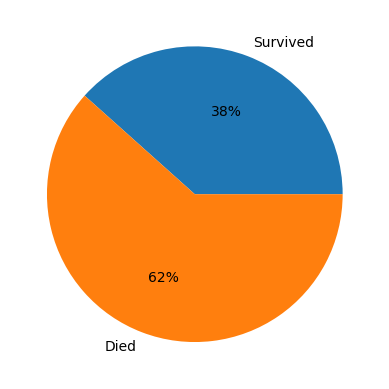

In [196]:

import matplotlib.pyplot as plt

survivors = df["Survived"].sum()
dead = len(df["Survived"])-survivors

labels = ["Survived", "Died"]

plt.pie([survivors, dead], labels = labels,  autopct='%1.0f%%')
#plt.legend(loc = 2, fontsize = 12)

In [160]:
#Bar diagrams for the categorical variables

males = np.sum(np.array(df["Sex"] =="male"))
females = len(df)- total_males
surv_male = np.sum(np.array((df["Sex"] =="male") & (df["Survived"]==1)))
surv_female = np.sum(np.array((df["Sex"] =="female") & (df["Survived"]==1)))


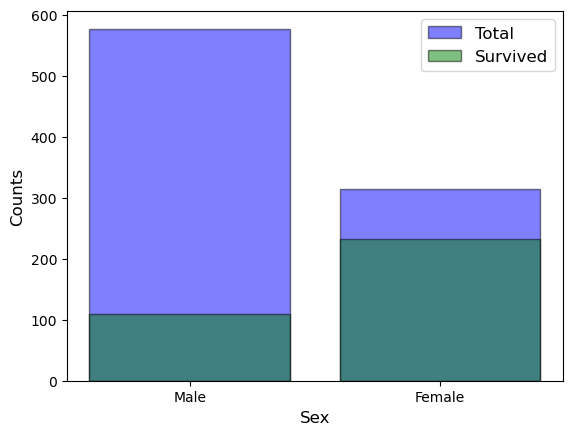

In [173]:
labels = ["Male",  "Female"]
people = [total_males,  total_females]
surv = [surv_male, surv_female]
colors = ["blue", "pink"]
plt.bar(labels, people, alpha = 0.5, edgecolor = "black", color = "blue")
plt.bar(labels, surv, alpha = 0.5, edgecolor = "black", color = "green")
plt.xlabel("Sex", fontsize = 12)
plt.legend(["Total","Survived"], loc = "best", fontsize = 12)
plt.ylabel("Counts", fontsize = 12)
plt.show()

In [174]:
first = np.sum(np.array(df["Pclass"] == 1))
second = np.sum(np.array(df["Pclass"] == 2))
third = np.sum(np.array(df["Pclass"] == 3))

surv_1 = np.sum(np.array((df["Pclass"] == 1) & (df["Survived"] == 1)))
surv_2 = np.sum(np.array((df["Pclass"] == 2) & (df["Survived"] == 1)))
surv_3 = np.sum(np.array((df["Pclass"] == 3) & (df["Survived"] == 1)))

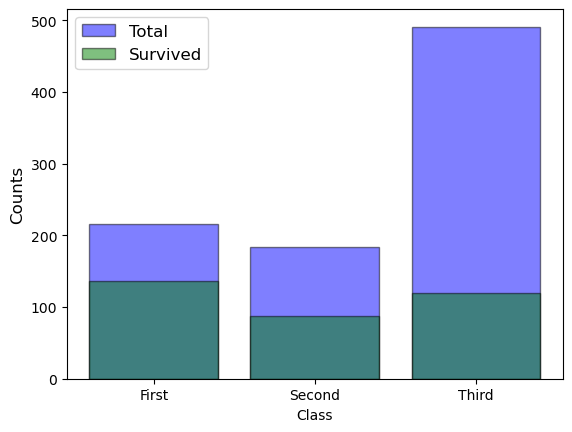

In [175]:
labels = ["First", "Second", "Third"]
numbers = [ first, second, third]
alive = [surv_1, surv_2, surv_3]
colors = ["blue", "red", "green"]
plt.bar(labels, numbers, alpha = 0.5, edgecolor = "black", color = "blue")
plt.bar(labels, alive, alpha = 0.5, edgecolor = "black", color = "green")
plt.legend(["Total", "Survived"], loc = "best", fontsize = 12)
plt.xlabel("Class")
plt.ylabel("Counts", fontsize = 12)
plt.show()

Text(0, 0.5, 'Counts')

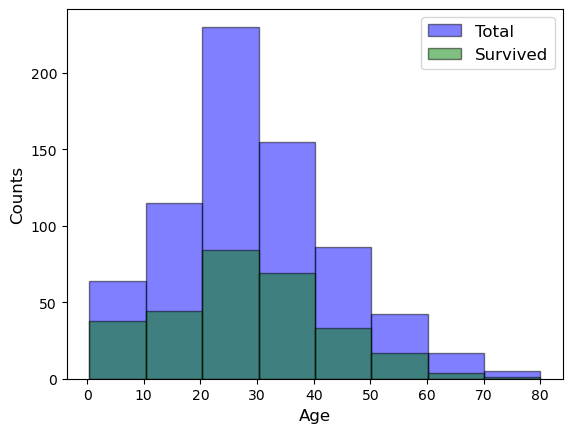

In [185]:
#Lets filter the ages of those who survived
is_alive = df["Survived"] == 1
ages = df[is_alive]
df['Age'].plot.hist(bins=8, color='blue', label='Total', edgecolor='black', alpha = 0.5)
ages["Age"].plot.hist(bins=8, color='green', label='Survived', edgecolor='black', alpha = 0.5)
plt.legend(loc='best', fontsize = 12)
plt.xlabel("Age", fontsize = 12)
plt.ylabel("Counts", fontsize = 12)
